## Decision Trees


1. Generate a toy classification problem dataset for the cartesian coordinate system with two classes (K=2).
    - Pick two random class center coordinates.
    - For each cluster center, generate 20 data points (samples) by adding random noise values to class center values.
    - Store dataset X along with ground truth label values for each sample.
    - Shuffle the dataset (randomize the order of samples in your dataset).
    - Separate your dataset X into training and test sets

2. Implement the classification decision tree algoritm and generate a tree using your training set.

3. Report performance on prediction of training set labels.

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def node_entropy(x):
    ent = 0
    for i in range(2):
        class_count=len(x[x[:,2]==int(i)])
        try:
            pmi = class_count/x.shape[0]
        except:
            pmi = 0
        if pmi != 0:
            ent -= (pmi)*np.log2(pmi)
        else:
            pass
    return ent

In [3]:
def split_entropy(x, val, i):
    lmp = 0
    left_branch = x[x[:, i] <= val]
    right_branch = x[x[:, i] > val]
    lmp += (left_branch.shape[0]/x.shape[0]) * node_entropy(left_branch)
    lmp += (right_branch.shape[0]/x.shape[0]) * node_entropy(right_branch)
    return lmp

In [4]:
def split_attribute(x):
    minent = np.inf
    for i in range(2):
        for val in x[:, int(i)]:
            ent = split_entropy(x, val, i)
            if ent < minent:
                minent = ent
                best_f = i
                threshold = val
    return (best_f, threshold)

In [5]:
def generate_tree(x, theta=0):
    if node_entropy(x) <= theta:
        entropy = node_entropy(x)
        majority_class = 1 if x[x[:,2] == 1].shape[0] > x[x[:,2] == 2].shape[0] else 0

        return (majority_class, entropy, None)
    else:
        i, xi = split_attribute(x) # attribute idx and split entropy

        Tree = {}

        x_left = x[x[:, int(i)] <= xi]
        x_right = x[x[:, int(i)] > xi]

        Tree[(i, xi, True)] = generate_tree(x_left) # Left branch
        Tree[(i, xi, False)] = generate_tree(x_right) # Right branch

        return Tree

In [6]:
def classify_point(Tree, point):

    if type(Tree) != dict:
        return Tree
    else:
        for d in Tree:
            i, x, binary = d

        if point[int(i)] <= x:
            return classify_point(Tree[(i, x, True)], point)
        else:
            return classify_point(Tree[(i, x, False)], point)

In [7]:
def check_accuracy(Tree, X_check):
    right = 0

    total = 0
    for i in X_check:
        #print('Data',i[0], i[1], i[2])
        #print('Tree ',classify_point(Tree, i[:2]))
        if classify_point(Tree, i[:2])[0] == i[2]: 
            right += 1
        total +=1
    return right/total

### Generate data

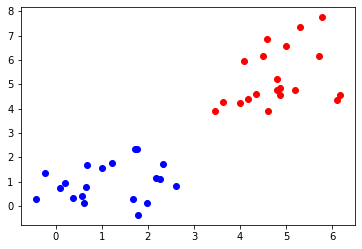

[[-0.229  1.356  1.   ]
 [ 6.118  4.36   0.   ]
 [ 0.574  0.395  1.   ]
 [ 2.18   1.138  1.   ]
 [ 0.372  0.311  1.   ]
 [ 5.191  4.749  0.   ]
 [ 3.634  4.278  0.   ]
 [ 1.719  2.36   1.   ]
 [ 4.502  6.155  0.   ]
 [ 4.807  5.209  0.   ]
 [ 0.605  0.125  1.   ]
 [ 1.769  2.36   1.   ]
 [ 6.178  4.537  0.   ]
 [ 3.453  3.902  0.   ]
 [ 2.612  0.823  1.   ]
 [ 0.201  0.947  1.   ]
 [ 4.172  4.405  0.   ]
 [ 4.878  4.57   0.   ]
 [ 1.218  1.753  1.   ]
 [ 1.779 -0.367  1.   ]
 [ 4.351  4.598  0.   ]
 [ 2.332  1.74   1.   ]
 [-0.437  0.291  1.   ]
 [ 0.685  1.681  1.   ]
 [ 5.009  6.557  0.   ]
 [ 4.862  4.827  0.   ]
 [ 0.649  0.764  1.   ]
 [ 2.258  1.101  1.   ]]


In [8]:
C1 = (5, 5)
C2 = (1,1)

X1 = np.round(np.array([np.array([C1[0]]*20)+np.random.normal(0,1,20),
               np.array([C1[1]]*20)+np.random.normal(0,1,20),
               [0]*20]),3).T

X2 = np.round(np.array([np.array([C2[0]]*20)+np.random.normal(0,1,20),
              np.array([C2[1]]*20)+np.random.normal(0,1,20),
              [1]*20]),3).T

X = np.append(X1, X2, axis=0)

np.random.shuffle(X)

plt.plot(X1[:,0], X1[:,1], 'ro')
plt.plot(X2[:,0], X2[:,1], 'bo')
plt.show()


X_train = X[:int(40*0.7),:]
X_test = X[int(40*0.7):,:]

print(X_train)

### Generate tree

In [9]:
Tree = generate_tree(X_train)
print(Tree)
print("Train accuracy = {}".format(check_accuracy(Tree, X_train)))
print("Test Accuracy = {}".format(check_accuracy(Tree, X_test)))

plt.show()

{(0, 2.612, True): (1, 0.0, None), (0, 2.612, False): (0, 0.0, None)}
Train accuracy = 1.0
Test Accuracy = 1.0
